#1: What is Simple Linear Regression?

Simple Linear Regression is a statistical method used to model the linear relationship between two variables — one independent variable (X) and one dependent variable (Y). It assumes that this relationship can be described using a straight line (hence “linear”).

📘 **Equation**
$Y = β_0 + β_1X + ε$

Where:
$Y$: Dependent variable (what you want to predict)
$X$: Independent variable (input feature)
$β_0$: Intercept (value of Y when X = 0)
$β_1$: Slope (rate of change of Y per unit change in X)
$ε$: Error term (difference between actual and predicted values)

Essentially, Simple Linear Regression tries to find the best-fitting straight line through a set of data points. This line minimizes the sum of the squared differences between the actual Y values and the Y values predicted by the line.

**Key Concepts:**

*   **Independent Variable (X):** The variable that is hypothesized to influence the dependent variable.
*   **Dependent Variable (Y):** The variable that is being predicted or explained.
*   **Intercept (β₀):** The predicted value of Y when X is zero.
*   **Slope (β₁):** Represents the change in Y for every one-unit increase in X.
*   **Error Term (ε):** Accounts for the variability in Y that is not explained by the linear relationship with X.

**Assumptions of Simple Linear Regression:**

For the results of Simple Linear Regression to be reliable, several assumptions should ideally be met:

*   **Linearity:** The relationship between X and Y is linear.
*   **Independence:** The observations are independent of each other.
*   **Homoscedasticity:** The variance of the error term is constant across all values of X.
*   **Normality:** The error term is normally distributed.

Simple Linear Regression is a fundamental technique in statistics and machine learning, often used for prediction, understanding relationships between variables, and as a building block for more complex models.

#2: What are the key assumptions of Simple Linear Regression?

1. Linearity
The relationship between the independent variable (X) and the dependent variable (Y) is linear.
This means that a change in X produces a proportional change in Y.
 Check: Use scatter plots of X vs Y — the pattern should look roughly like a straight line.
2. Independence of Errors
The residuals (errors) — i.e., the differences between actual and predicted values — are independent of each other.
Violated if data points are related (e.g., time-series data with trends or autocorrelation).
 Check: Use the Durbin-Watson test to detect autocorrelation.
3. Homoscedasticity (Constant Variance of Errors)
The variance of the residuals should be constant across all levels of X.
In other words, the spread of errors should be similar for all predicted values.
 If the spread increases or decreases (a “funnel” shape), it’s called heteroscedasticity.
 Check: Plot residuals vs. fitted values — look for a random scatter.
4. Normality of Errors
The residuals (ε) are assumed to be normally distributed.
Important for hypothesis testing and confidence intervals.
 Check: Use a histogram or Q-Q plot of residuals.
5. No or Minimal Multicollinearity (for multiple regression)
For simple regression, this doesn’t apply because there’s only one X.
For multiple regression, independent variables shouldn’t be highly correlated.


#3: What is heteroscedasticity, and why is it important to address in regression models?



Heteroscedasticity occurs when the variance of the error term (residuals) in a regression model is not constant across all levels of the independent variable(s). In simpler terms, the spread of the residuals is different for different values of X.

**Visualizing Heteroscedasticity:**

Imagine plotting the residuals against the predicted values.
*   **Homoscedasticity:** The points are randomly scattered around zero with roughly the same vertical spread across the entire range of predicted values.
*   **Heteroscedasticity:** The points show a pattern, such as a "funnel" shape where the spread of the residuals increases or decreases as the predicted values change.

**Why is Heteroscedasticity Important to Address?**

While heteroscedasticity does **not** bias the coefficient estimates ($\beta_0$ and $\beta_1$), it violates one of the key assumptions of ordinary least squares (OLS) regression. This violation has several important consequences:

1.  **Inefficient Estimates:** The coefficient estimates are no longer the most efficient ones possible. This means that the standard errors of the coefficients are incorrect.
2.  **Incorrect Standard Errors:** The standard errors are typically underestimated in the presence of heteroscedasticity.
3.  **Invalid Hypothesis Tests and Confidence Intervals:** Because the standard errors are incorrect, hypothesis tests (like t-tests for significance) and confidence intervals will be unreliable. You might incorrectly conclude that a predictor is statistically significant or that the confidence interval is narrower than it should be.

In summary, while heteroscedasticity doesn't mean your model is wrong, it means your statistical inferences about the model's parameters might be incorrect.

**Addressing Heteroscedasticity:**

Several methods can be used to address heteroscedasticity:

*   **Data Transformations:** Applying transformations to the dependent variable (e.g., logarithmic transformation) can sometimes stabilize the variance.
*   **Weighted Least Squares (WLS):** This method assigns different weights to observations based on their variance, giving less weight to observations with higher variance.
*   **Robust Standard Errors:** These are standard errors that are adjusted to be valid even in the presence of heteroscedasticity. This is a common approach as it doesn't require changing the model or data.

### Example of Heteroscedasticity

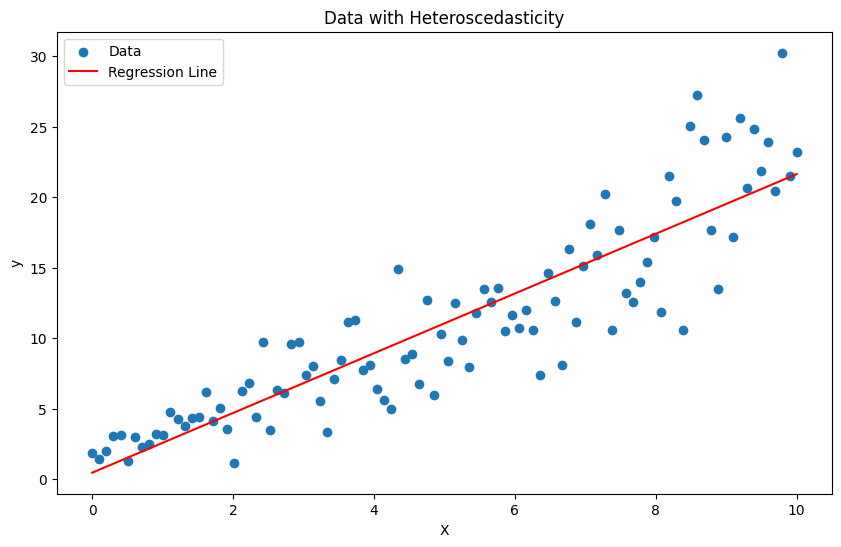

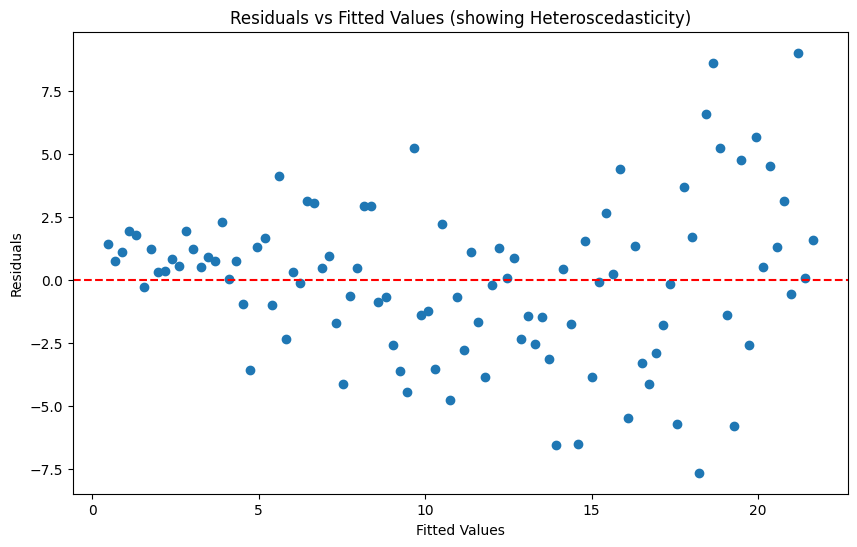

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     387.3
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           8.10e-36
Time:                        09:12:03   Log-Likelihood:                -255.19
No. Observations:                 100   AIC:                             514.4
Df Residuals:                      98   BIC:                             519.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4690      0.623      0.753      0.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data with heteroscedasticity
np.random.seed(0)
X = np.linspace(0, 10, 100)
# The error term variance increases with X
error = np.random.normal(0, 0.5 + 0.5 * X, 100)
y = 2 * X + 1 + error

# Fit a simple linear regression model
X = sm.add_constant(X) # Add an intercept term
model = sm.OLS(y, X)
results = model.fit()

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, label='Data')
plt.plot(X[:, 1], results.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data with Heteroscedasticity')
plt.legend()
plt.show()

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (showing Heteroscedasticity)')
plt.show()

print(results.summary())

# 4: What is Multiple Linear Regression?



Multiple Linear Regression is an extension of Simple Linear Regression that models the linear relationship between a dependent variable ($Y$) and **two or more** independent variables ($X_1, X_2, ..., X_n$).

📘 **Equation**
$Y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + ε$

Where:
$Y$: Dependent variable (what you want to predict)
$X_1, X_2, ..., X_n$: Independent variables (input features)
$β_0$: Intercept (value of Y when all X variables are 0)
$β_1, β_2, ..., β_n$: Coefficients for each independent variable (rate of change of Y per unit change in the corresponding X variable, holding other X variables constant)
$ε$: Error term (difference between actual and predicted values)

In Multiple Linear Regression, we are trying to find the best-fitting hyperplane (a higher-dimensional equivalent of a line) through the data points in a multi-dimensional space. This hyperplane minimizes the sum of the squared differences between the actual Y values and the Y values predicted by the model.

**Key Concepts:**

*   **Independent Variables ($X_i$):** Multiple variables that are hypothesized to influence the dependent variable.
*   **Dependent Variable (Y):** The variable that is being predicted or explained.
*   **Intercept (β₀):** The predicted value of Y when all independent variables are zero.
*   **Coefficients (βᵢ):** Each coefficient represents the change in Y for a one-unit increase in the corresponding independent variable, *assuming all other independent variables are held constant*. This "holding other variables constant" is a crucial distinction from simple linear regression.
*   **Error Term (ε):** Accounts for the variability in Y that is not explained by the linear relationship with the independent variables.

**Assumptions of Multiple Linear Regression:**

Multiple Linear Regression shares many assumptions with Simple Linear Regression, with a few additions:

*   **Linearity:** The relationship between each independent variable and the dependent variable is linear, and the overall relationship is linear in the parameters.
*   **Independence of Errors:** The residuals are independent of each other.
*   **Homoscedasticity:** The variance of the error term is constant across all levels of the independent variables.
*   **Normality of Errors:** The residuals are assumed to be normally distributed.
*   **No or Minimal Multicollinearity:** The independent variables should not be highly correlated with each other. High multicollinearity can make it difficult to interpret the individual coefficients and can inflate their standard errors.

Multiple Linear Regression is a powerful and widely used technique for modeling complex relationships and making predictions based on multiple factors.

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate synthetic data with multiple independent variables
np.random.seed(0)
X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 5
X3 = np.random.rand(100) * 2
# y = 2*X1 + 1.5*X2 + 3*X3 + intercept + noise
y = 2 * X1 + 1.5 * X2 + 3 * X3 + 5 + np.random.randn(100) * 2

# Create a pandas DataFrame for easier handling
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# Define independent variables (X) and dependent variable (y)
X = data[['X1', 'X2', 'X3']]
y = data['y']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# You can also make predictions
# new_data = pd.DataFrame({'X1': [6], 'X2': [3], 'X3': [1]})
# new_data = sm.add_constant(new_data, prepend=False) # Add constant to new data
# predicted_y = model.predict(new_data)
# print(f"\nPredicted y for new data: {predicted_y[0]}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     323.7
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           4.69e-50
Time:                        09:17:42   Log-Likelihood:                -202.28
No. Observations:                 100   AIC:                             412.6
Df Residuals:                      96   BIC:                             423.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4531      0.643      8.479      0.0

# 5: What is Polynomial Regression?



Polynomial Regression is a form of regression analysis in which the relationship between the independent variable ($X$) and the dependent variable ($Y$) is modeled as an *n*th degree polynomial. While it might seem different from linear regression due to the curved line it can produce, it's still considered a form of **linear model** because the relationship is linear in the coefficients ($\beta$).

📘 **Equation**
For a single independent variable X, a polynomial regression model of degree *n* is represented as:
$Y = β_0 + β_1X + β_2X^2 + ... + β_nX^n + ε$

Where:
$Y$: Dependent variable
$X$: Independent variable
$β_0, β_1, ..., β_n$: Coefficients of the polynomial terms
$ε$: Error term

**How it Differs from Linear Regression:**

The key difference lies in the relationship between the independent and dependent variables:

*   **Linear Regression:** Assumes a strictly linear relationship between X and Y. The model fits a straight line to the data.
    $Y = β_0 + β_1X + ε$
*   **Polynomial Regression:** Allows for a non-linear relationship between X and Y by including polynomial terms (e.g., $X^2, X^3$). The model fits a curve to the data.

**Why use Polynomial Regression?**

Polynomial regression is used when the relationship between the variables is not simply linear. By including higher-order terms, it can capture curves and bends in the data that a straight line cannot. This can lead to a better fit for the data and potentially more accurate predictions within the range of the observed data.

**Important Considerations:**

*   **Choosing the Degree (n):** Selecting the appropriate degree of the polynomial is crucial. A low degree might not capture the non-linear relationship, while a high degree can lead to overfitting the training data, resulting in poor generalization to new data.
*   **Interpretation of Coefficients:** Interpreting the coefficients in polynomial regression is less straightforward than in linear regression because the terms are related.
*   **Extrapolation:** Extrapolating (making predictions outside the range of the observed data) with polynomial regression can be risky, as the curve can behave erratically beyond the data points.

In essence, polynomial regression provides more flexibility than simple linear regression to model more complex relationships between variables, while still using the principles of linear modeling.

# 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data: X = [1, 2, 3, 4, 5] Y = [2.1, 4.3, 6.1, 7.9, 10.2] Plot the regression line over the data points.

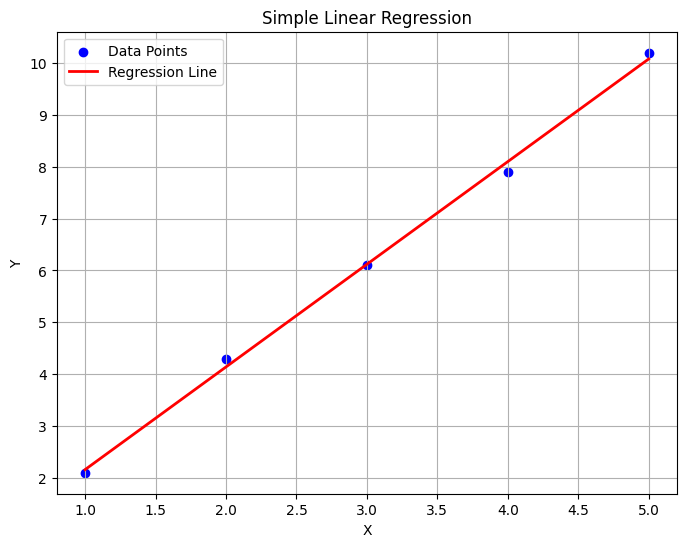

Intercept: 0.17999999999999794
Coefficient (Slope): 1.9800000000000004


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # Reshape X for scikit-learn
y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict Y values
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Slope): {model.coef_[0]}")

# 7. Fit a Multiple Linear Regression model on this sample data:
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {'Area': [1200, 1500, 1800, 2000],
        'Rooms': [2, 3, 3, 4],
        'Price': [250000, 300000, 320000, 370000]}

df = pd.DataFrame(data)

# Define independent variables (X) and dependent variable (y)
X = df[['Area', 'Rooms']]
y = df['Price']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print("Multiple Linear Regression Model Summary:")
print(model.summary())

# Calculate VIF for multicollinearity check
print("\nVariance Inflation Factor (VIF) for Multicollinearity Check:")
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Interpret VIF results (general guideline)
print("\nVIF Interpretation:")
print("VIF = 1: No correlation between the independent variable and other variables.")
print("1 < VIF < 5: Moderately correlated.")
print("VIF >= 5: Highly correlated (potential multicollinearity issue).")

Multiple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Tue, 14 Oct 2025   Prob (F-statistic):             0.0377
Time:                        09:19:59   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#8. Implement polynomial regression on the following data:
●
X = [1, 2, 3, 4, 5]
3
●
Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below.)

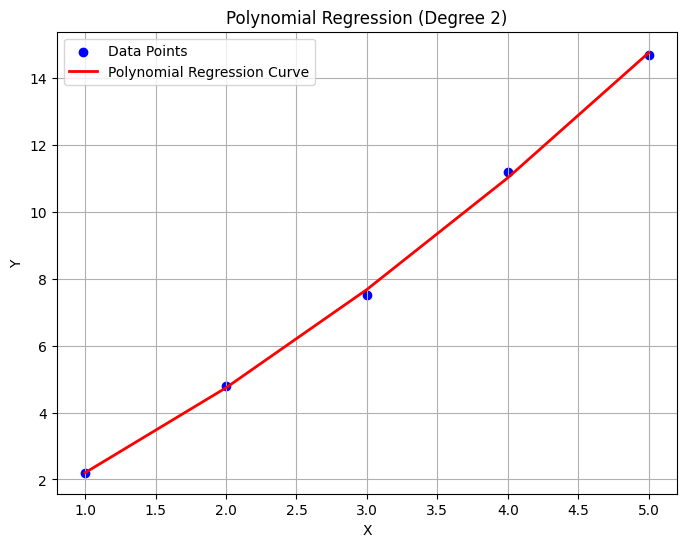

Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (2nd degree)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y)

# Predict Y values using the fitted model
y_pred = model.predict(X_poly)

# Plot the original data points and the polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# 9: Create a residuals plot for a regression model trained on this data:
●
X = [10, 20, 30, 40, 50]
●
Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)

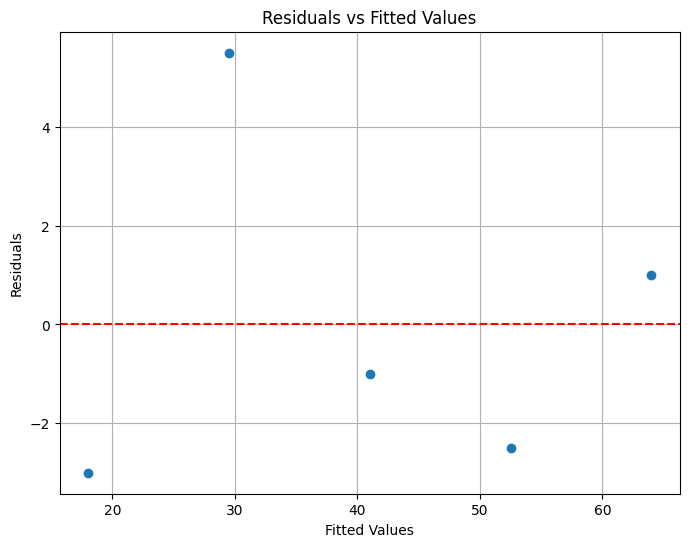

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     83.53
Date:                Tue, 14 Oct 2025   Prob (F-statistic):            0.00277
Time:                        09:21:48   Log-Likelihood:                -12.723
No. Observations:                   5   AIC:                             29.45
Df Residuals:                       3   BIC:                             28.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5000      4.173      1.558      0.2

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample data
X = np.array([10, 20, 30, 40, 50])
y = np.array([15, 35, 40, 50, 65])

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit a simple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Get the fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Create the residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# Print the model summary (optional, but can help in assessment)
print(results.summary())

# Assess heteroscedasticity based on the plot
print("\nAssessing Heteroscedasticity:")
print("Examine the residuals plot. If the points are randomly scattered around zero with a roughly constant vertical spread across all fitted values, the assumption of homoscedasticity is likely met.")
print("If the spread of residuals increases or decreases as the fitted values change (e.g., a funnel shape), it suggests heteroscedasticity.")

# 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

as a data scientist working for a real estate company, here's how I would address heteroscedasticity and multicollinearity in a regression model for predicting house prices:

Addressing Heteroscedasticity:

Heteroscedasticity means the spread of the errors (residuals) is not constant across all predicted house prices. This doesn't bias the coefficients but makes the standard errors and thus, hypothesis tests and confidence intervals unreliable. Here are the steps I'd take:

Diagnosis: I've already detected it, likely through a residuals vs. fitted values plot (looking for a funnel shape) or statistical tests like the Breusch-Pagan or White test.
Transformation: I'd first consider transforming the dependent variable (house price) or some independent variables. Common transformations include:
Logarithmic Transformation: Taking the natural logarithm of the house price often helps stabilize variance, especially if the spread of errors increases with price.
Square Root Transformation: Another option for stabilizing variance.
Weighted Least Squares (WLS): If transformations aren't effective or appropriate, I'd consider using WLS. This method assigns lower weights to observations with higher variance, effectively giving them less influence on the model fitting process.
Robust Standard Errors: This is often the most straightforward approach, especially if the primary concern is valid inference (hypothesis testing and confidence intervals). Robust standard errors adjust for heteroscedasticity without changing the coefficient estimates. statsmodels in Python makes this relatively easy.
Addressing Multicollinearity:

Multicollinearity occurs when independent variables are highly correlated with each other. This makes it difficult to interpret the individual coefficients and can inflate their standard errors. Here's how I'd tackle it:

Diagnosis: I've already detected it, likely through Variance Inflation Factor (VIF) values. VIF values above 5 or 10 generally indicate problematic multicollinearity. Correlation matrices can also show pairwise correlations.
Remove Highly Correlated Predictors: If two or more predictors are highly correlated, I would consider removing one of them. The choice of which one to remove might depend on domain knowledge, variable importance, or which variable is easier to collect or interpret.
Combine Predictors: Instead of removing variables, I might create a new composite variable from the highly correlated ones. For example, if 'number of rooms' and 'number of bathrooms' are highly correlated, I might create a new feature like 'total number of main rooms'.
Principal Component Analysis (PCA): For more complex multicollinearity involving multiple variables, PCA can be used to create a new set of uncorrelated variables (principal components) that capture most of the variance in the original predictors. The regression model would then be fit on these principal components.
Regularization Techniques: Techniques like Ridge Regression or Lasso Regression can help mitigate the effects of multicollinearity by adding a penalty term to the loss function during model training. Ridge regression is particularly good at handling multicollinearity.
Ensuring a Robust Model:

Beyond addressing these specific issues, I'd take these general steps to ensure a robust model:

Data Cleaning and Preprocessing: Handle missing values, outliers, and ensure variables are in appropriate formats.
Feature Engineering: Create new features that might better capture the relationship with house prices (e.g., 'age of house', 'distance to nearest school').
Model Validation: Split the data into training, validation, and test sets. Evaluate the model's performance on unseen data using appropriate metrics (e.g., R-squared, Mean Absolute Error, Root Mean Squared Error).
Residual Analysis: After addressing the issues, re-examine the residuals plot and other diagnostic plots to ensure the assumptions of the linear model are reasonably met.
Domain Expertise: Collaborate with real estate experts to ensure the model's findings align with their knowledge and to get insights on relevant features and potential issues.
Iterative Process: Model building is often an iterative process. I'd continue to refine the model based on performance and diagnostic checks.
By systematically addressing heteroscedasticity and multicollinearity, and following best practices for model building and validation, I can build a more reliable and interpretable model for predicting house prices.

#